<a href="https://colab.research.google.com/github/aleksficek/Face-Mask-Detector/blob/main/maskyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
%cd gdrive
%cd My\ Drive
%cd darknet
%cd ultra

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive/My Drive/darknet/ultra/yolov3
[Errno 2] No such file or directory: 'My Drive'
/content/gdrive/My Drive/darknet/ultra/yolov3
[Errno 2] No such file or directory: 'darknet'
/content/gdrive/My Drive/darknet/ultra/yolov3
[Errno 2] No such file or directory: 'ultra'
/content/gdrive/My Drive/darknet/ultra/yolov3


In [3]:
### NEED FOR INFERENCE
import time
import glob
import torch
import os
import matplotlib.pyplot as plt

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
### NEED FOR INFERENCE
# clone ultralytics yolo repo probably from commnd line
# git clone https://github.com/ultralytics/yolov3 

# enter directory which contains the model "/yolov3"
# cd yolov3

In [4]:
# !git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3

/content/gdrive/My Drive/darknet/ultra/yolov3


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/2 data/samples/bus.jpg: 512x384 3 persons, 1 buss, 1 ties, Done. (0.078s)
image 2/2 data/samples/zidane.jpg: 288x512 3 persons, 1 ties, Done. (0.070s)
Results saved to /content/gdrive/My Drive/darknet/ultra/yolov3/output
Done. (0.392s)


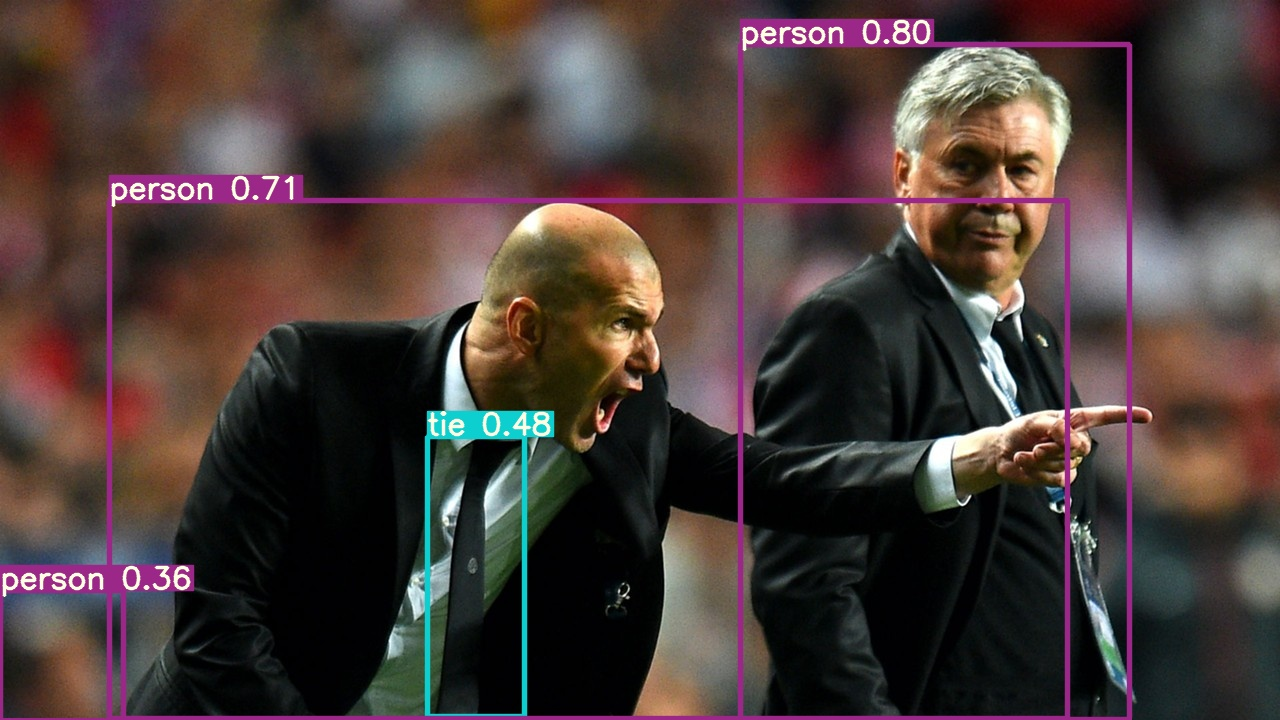

In [ ]:
# Detect on coco dataset
# !python3 detect.py
# Image(filename='output/zidane.jpg', width=600)

# Train 1 epoch yolo3-spp weights
# !python3 train.py --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320 --epochs 1 --batch-size 16 --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-spp-ultralytics.pt

# Detect with "best" weights
# !python3 detect.py --names /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.names --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/best.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg  --source /content/gdrive/My\ Drive/darknet/dataset/yolo/images/test --conf-thres 0.3 --iou-thres 0.6

# Detect specific image with "best" weights
# from PIL import Image
# Image.open('/content/gdrive/My Drive/darknet/ultra/yolov3/output/jlin.jpg')

In [20]:
!python3 train.py --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320 --epochs 100 --batch-size 32 \
  --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/stock6.pt

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 4 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, backbone_end=91, batch_size=32, bucket='', cache_images=False, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg', custom_freeze=False, data='/content/gdrive/My Drive/darknet/dataset/yolo/obj.data', device='', epochs=100, evolve=False, freeze_layers=False, img_size=[320], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/My Drive/darknet/dataset/yolo/stock6.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-11-20 02:33:05.394684: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.

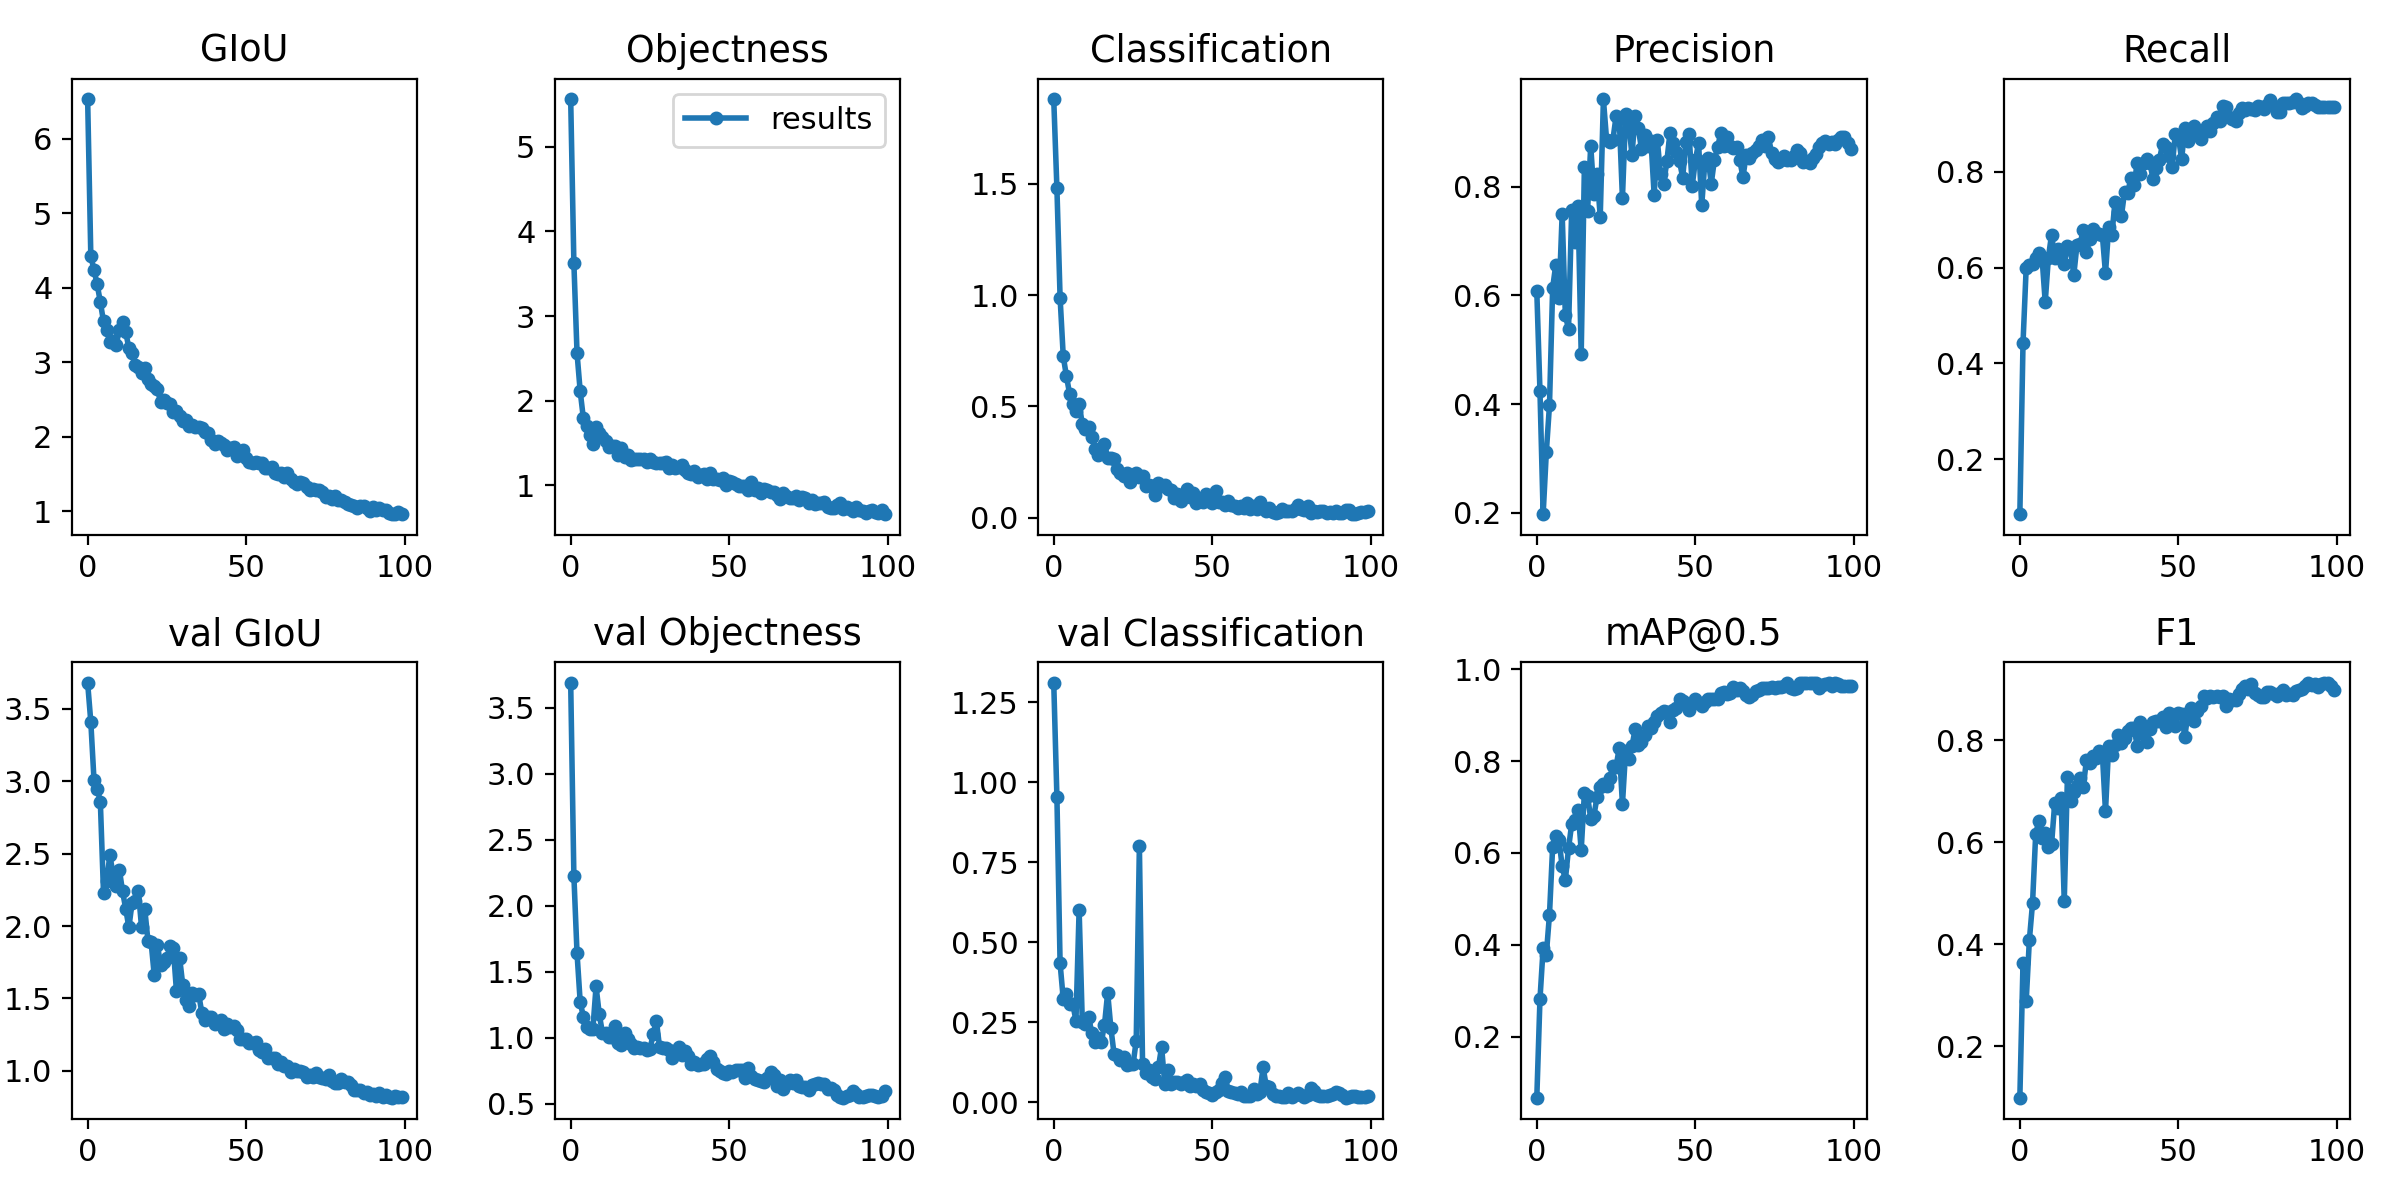

In [22]:
# Output results
# !python3 -c "from utils import utils; utils.plot_results()"
Image(filename='results.png', width=800)

In [29]:
!python3 test.py --weights /content/gdrive/My\ Drive/darknet/ultra/yolov3/weights/last.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-transfer.cfg \
  --conf-thres 0.3 --iou-thres 0.6 --augment --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320 --batch-size 32

Namespace(augment=True, batch_size=32, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-transfer.cfg', conf_thres=0.3, data='/content/gdrive/My Drive/darknet/dataset/yolo/obj.data', device='', img_size=320, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='/content/gdrive/My Drive/darknet/ultra/yolov3/weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25519e+07 parameters, 6.25519e+07 gradients
Caching labels /content/gdrive/My Drive/darknet/dataset/yolo/test.txt (160 found, 0 missing, 0 empty, 0 duplicate, for 160 images): 100% 160/160 [00:00<00:00, 958.97it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/5 [00:00<?, ?it/s]/content/gdrive/My Drive/darknet/ultra/yolov3/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	n

In [ ]:
!python3 -c "from utils.utils import *; create_backbone(f='weights/last.pt')"

In [26]:
### NEED THIS FOR INFERENCE
!python3 detect.py --names /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.names --weights /content/gdrive/My\ Drive/darknet/ultra/yolov3/weights/actual_final.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg  --source /content/gdrive/My\ Drive/darknet/dataset/photo.jpg --conf-thres 0.3 --iou-thres 0.6 --img-size 320


Namespace(agnostic_nms=False, augment=False, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=320, iou_thres=0.6, names='/content/gdrive/My Drive/darknet/dataset/yolo/obj.names', output='output', save_txt=False, source='/content/gdrive/My Drive/darknet/dataset/photo.jpg', view_img=False, weights='/content/gdrive/My Drive/darknet/ultra/yolov3/weights/actual_final.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
Traceback (most recent call last):
  File "detect.py", line 191, in <module>
    detect()
  File "detect.py", line 70, in detect
    dataset = LoadImages(source, img_size=imgsz)
  File "/content/gdrive/My Drive/darknet/ultra/yolov3/utils/datasets.py", line 67, in __init__
    (path, img_formats, vid_formats)
AssertionError: No images or videos found in /content/gdrive/My D

In [ ]:
### NEED THIS FOR INFERENCE
from PIL import Image
# Image.open('/content/gdrive/My Drive/darknet/ultra/yolov3/output/jlin.jpg')

In [27]:
### NEED THIS FOR INFERENCE
!python3 detect.py --names /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.names --weights /content/gdrive/My\ Drive/darknet/ultra/yolov3/weights/last.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg --source /content/gdrive/My\ Drive/darknet/dataset/photo.jpg --conf-thres 0.3 --iou-thres 0.6


Namespace(agnostic_nms=False, augment=False, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='/content/gdrive/My Drive/darknet/dataset/yolo/obj.names', output='output', save_txt=False, source='/content/gdrive/My Drive/darknet/dataset/photo.jpg', view_img=False, weights='/content/gdrive/My Drive/darknet/ultra/yolov3/weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
image 1/1 /content/gdrive/My Drive/darknet/dataset/photo.jpg: 384x512 1 Masks, Done. (0.037s)
Results saved to /content/gdrive/My Drive/darknet/ultra/yolov3/output
Done. (0.353s)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


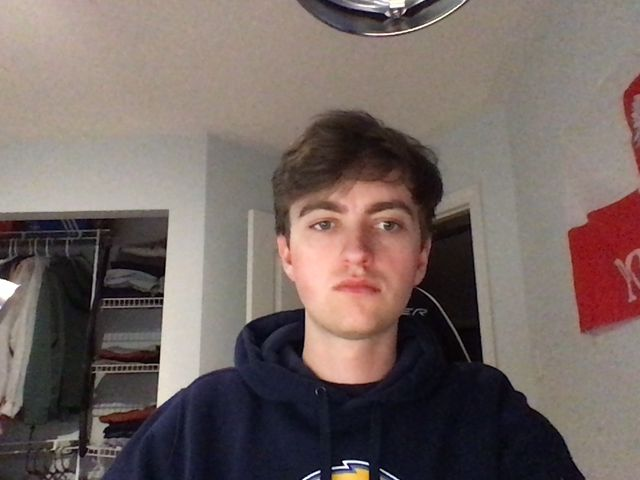

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))